In [13]:
"""
Template matching:
Scan over an image for a provided template for an EXACT match.
Matchings are based on correlations between a region with the given image
using some metrics.
"""
import cv2
import numpy as np
import matplotlib.pyplot as plt

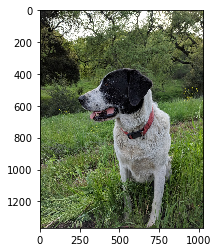

In [14]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

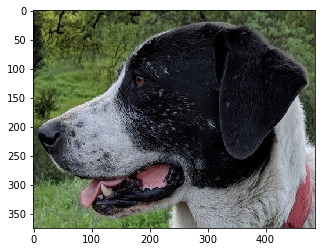

In [15]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [7]:
face.shape

(375, 486, 3)

In [8]:
# eval function
my_str = 'sum'
eval(my_str)

<function sum(iterable, start=0, /)>

In [9]:
# Use eval to turn string to a built-in function
my_func = eval(my_str)
my_func([1, 2, 3])

6

In [10]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

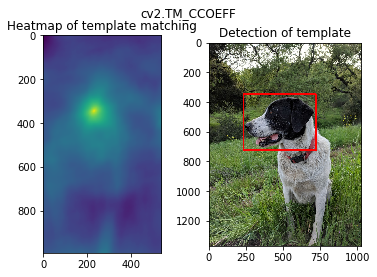

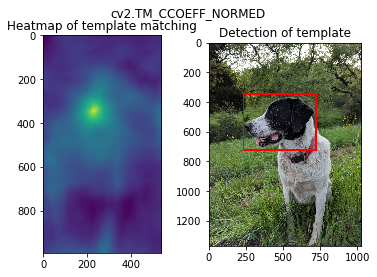

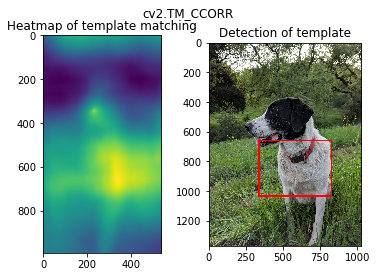

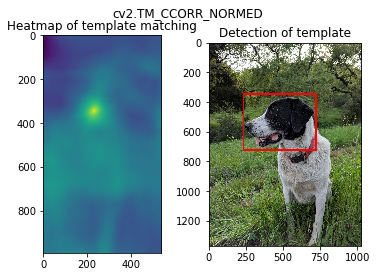

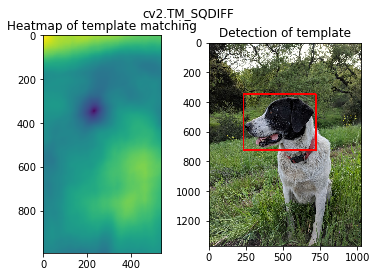

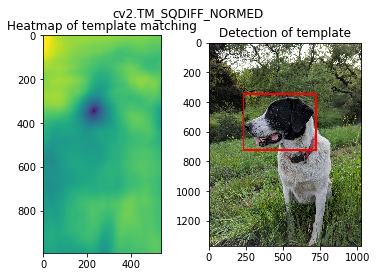

In [21]:
for m_str in methods:
    full_copy = full.copy()
    method = eval(m_str)
    res = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channels = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_copy, top_left, bottom_right,
                 (255, 0, 0), 10)
    
    # Show Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of template matching")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Detection of template")
    plt.suptitle(m_str)
    
    plt.show()

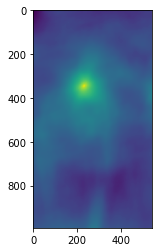

In [16]:
# The highlighted point is the region of match
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)
plt.imshow(res)